In [40]:
import pandas
from itertools import product
import sys, argparse, os
import numpy as np
from math import log, ceil
from scipy.stats import multinomial, chi2
from math import factorial
import re
import os

In [41]:
from Bio import Phylo

from io import BytesIO     # for handling byte strings
from io import StringIO    # for handling unicode strings

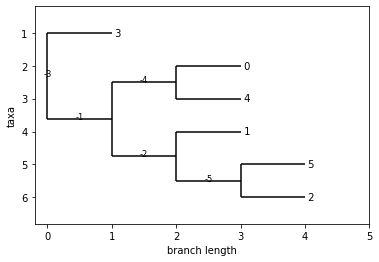

In [42]:
# treedata = "(((A,B),(C,(D,E))),F);"
treedata = "(((0,4)-4,(1,(5,2)-5)-2)-1,3)-3;"
# treedata = "(A,(B,C),(D,E));"
handle = StringIO(treedata)
tree = Phylo.read(handle, "newick")

tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

In [43]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(confidence=-3.0)
        Clade(name='3')
        Clade(confidence=-1.0)
            Clade(confidence=-4.0)
                Clade(name='0')
                Clade(name='4')
            Clade(confidence=-2.0)
                Clade(name='1')
                Clade(confidence=-5.0)
                    Clade(name='5')
                    Clade(name='2')


In [44]:
def get_children_num(clade):
    for idx in range(len(clade)):
        if clade[idx].is_terminal():
            print(clade[idx].name)
        else:
            print(clade[idx].confidence)
        get_children_num(clade[idx])

In [45]:
get_children_num(tree.root)

3
-1.0
-4.0
0
4
-2.0
1
-5.0
5
2


In [63]:
class Bandelt_Node:
    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.data = data
        
    def find_node(self, val):
        if self.data == val:
            return self
        else:
            if (self.left == None) and (self.right == None):
                return None
            if self.left != None:
                find_left = self.left.find_node(val)
                if find_left != None:
                    return find_left
            if self.right != None:
                find_right = self.right.find_node(val)
                if find_right != None:
                    return find_right
            return None
        
    def print_details(self):
        parent_data = self.parent.data if (self.parent != None) else self.parent
        left_data = self.left.data if (self.left != None) else self.left
        right_data = self.right.data if (self.right != None) else self.right
        print("Current Value: ", self.data, "; Parent: ", parent_data, "; left: ", left_data, "; right: ", right_data)

In [64]:
def create_Bandelt_Tree(clade, parent_node):
    for idx in range(len(clade)):
        if idx == 0:
            if clade[idx].is_terminal():
                children_node = Bandelt_Node(str(clade[idx].name))
                # Parent add 
                parent_node.left = children_node
                children_node.parent = parent_node
                print(clade[idx].name)
            else:
                children_node = Bandelt_Node(str(int(clade[idx].confidence)))
                parent_node.left = children_node
                children_node.parent = parent_node
                print(clade[idx].confidence)
        if idx == 1:  
            if clade[idx].is_terminal():
                children_node = Bandelt_Node(str(clade[idx].name))
                # Parent add 
                parent_node.right = children_node
                children_node.parent = parent_node
                print(clade[idx].name)
            else:
                children_node = Bandelt_Node(str(int(clade[idx].confidence)))
                parent_node.right = children_node
                children_node.parent = parent_node
                print(clade[idx].confidence)
        create_Bandelt_Tree(clade[idx], children_node)

In [ ]:
# def find_Bandelt_encode(target_node, val):
#     encode_num = None
#     if target_node.left != None:        
#         if abs(target_node.left.data) < abs(val):
#             encode_num = target_node.left.data
#     if target_node.right != None:        
#         if abs(target_node.right.data) < abs(val):
#             encode_num = target_node.right.data
#     if encode_num == None:
#         find_Bandelt_encode
#     if encode_num != None:
        
        
    

In [90]:
visited_nodes = []
queue = []

In [91]:
def bread_first_search(root_node):
    visited_nodes.append(root_node.data)
    queue.append(root_node)
    
    while queue:
        current_node = queue.pop(0)
        if current_node != None:
            print (current_node.data, end = " ") 
        if current_node.left != None:
            if current_node.left.data not in visited_nodes:
                visited_nodes.append(current_node.left.data)
                queue.append(current_node.left)
                
        if current_node.right != None:
            if current_node.right.data not in visited_nodes:
                visited_nodes.append(current_node.right.data)
                queue.append(current_node.right)    

In [92]:
bread_first_search(root_node)

* -3 3 -1 -4 -2 0 4 1 -5 5 2 

In [65]:
root_node = Bandelt_Node('*')

In [66]:
inner_root = Bandelt_Node(str(int(tree.root.confidence)))
root_node.left = inner_root
inner_root.parent = root_node

In [67]:
create_Bandelt_Tree(tree.root, inner_root)

3
-1.0
-4.0
0
4
-2.0
1
-5.0
5
2


In [68]:
root_node.left.right.data == '-1'

True

In [69]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(confidence=-3.0)
        Clade(name='3')
        Clade(confidence=-1.0)
            Clade(confidence=-4.0)
                Clade(name='0')
                Clade(name='4')
            Clade(confidence=-2.0)
                Clade(name='1')
                Clade(confidence=-5.0)
                    Clade(name='5')
                    Clade(name='2')


In [72]:
found_node = root_node.find_node('5')

In [75]:
found_node.print_details()

Current Value:  5 ; Parent:  -5 ; left:  None ; right:  None


In [78]:
for i in range(0, 5):
    target_node_val = -(i+1)
    found_node = root_node.find_node(str(target_node_val))
    print(found_node.print_details())

-1
Current Value:  -1 ; Parent:  -3 ; left:  -4 ; right:  -2
None
-2
Current Value:  -2 ; Parent:  -1 ; left:  1 ; right:  -5
None
-3
Current Value:  -3 ; Parent:  * ; left:  3 ; right:  -1
None
-4
Current Value:  -4 ; Parent:  -1 ; left:  0 ; right:  4
None
-5
Current Value:  -5 ; Parent:  -2 ; left:  5 ; right:  2
None


In [8]:
root = ACOPHY_Node(10)

In [10]:
root.print_tree()

10


In [38]:
import dendropy
from dendropy.calculate import treecompare
import random

In [39]:
taxon_namespace = dendropy.TaxonSet()
tree = dendropy.Tree.get(path="./simple_tree.nwk", schema="newick", taxon_set=taxon_namespace)

/home/howard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'TaxonSet' will no longer be supported in future releases; use 'TaxonNamespace' instead
  """Entry point for launching an IPython kernel.


In [41]:
s = tree.as_ascii_plot()
print(s)

                                                                    /---------------------- 0
                      /---------------------------------------------+                        
                      |                                             \---------------------- 4
/---------------------+                                                                      
|                     |                      /--------------------------------------------- 1
|                     \----------------------+                                               
+                                            |                      /---------------------- 5
|                                            \----------------------+                        
|                                                                   \---------------------- 2
|                                                                                            
\-----------------------------------------------------------

In [ ]:
tree

In [42]:
num = 6

In [49]:
Postorder = {}
for node in tree.postorder_node_iter():
    node = str(node)
    print(node)
    Arg = str("Taxon" in node)
    # internal nodes only
    if Arg != "True":
        num = num+1
        # unique node identifier as hash key
        Postorder[node[16:27]] = num

<Node object at 0x7f8c69296350: 'None' (<Taxon 0x7f8c692963d0 '0'>)>
<Node object at 0x7f8c69296490: 'None' (<Taxon 0x7f8c69296510 '4'>)>
<Node object at 0x7f8c692962d0: '-4' (None)>
<Node object at 0x7f8c69296690: 'None' (<Taxon 0x7f8c69296710 '1'>)>
<Node object at 0x7f8c69296850: 'None' (<Taxon 0x7f8c692968d0 '5'>)>
<Node object at 0x7f8c69296990: 'None' (<Taxon 0x7f8c69296a10 '2'>)>
<Node object at 0x7f8c692967d0: '-5' (None)>
<Node object at 0x7f8c69296610: '-2' (None)>
<Node object at 0x7f8c69296250: '-1' (None)>
<Node object at 0x7f8c69296bd0: 'None' (<Taxon 0x7f8c69296c50 '3'>)>
<Node object at 0x7f8c692961d0: '-3' (None)>


In [44]:
Postorder

{'0x7f8c69296': 11}

In [50]:
treedata = "(((0,4)-4,(1,(5,2)-5)-2)-1,3)-3;"